# Histograms of degrees in the UMAP / kNN graph

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data_seed = 3
umap_seed = 0

fig_path = "../figures"
data_path_c_elegans = "../data/packer_c-elegans"
data_path_ring = "../data/toy_ring"

In [8]:
# load default UMAP instance on ring data
with open(os.path.join(data_path_ring, f"toy_ring_1000_4_0_5_umapperns_init_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
    umapperns_init = pickle.load(file)
    embd_init = umapperns_init.embedding_
deg_ring_default = np.array(umapperns_init.graph_.todense()).sum(1)
n_neighs_ring = np.array(umapperns_init.graph_.todense() >0).sum(1)

print(deg_ring_default.mean())
print(n_neighs_ring.mean())


5.8273077
16.524


In [9]:
# load UMAP instance on ring data with dense input similarity
with open(os.path.join(data_path_ring, f"toy_ring_1000_4_0_5_umapperns_init_graph_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
    umapperns_init_graph = pickle.load(file)
    embd_init_graph = umapperns_init_graph.embedding_
deg_ring_graph = np.array(umapperns_init_graph.graph_.todense()).sum(1)
n_neighs_ring_graph = np.array(umapperns_init_graph.graph_.todense() >0).sum(1)

print(deg_ring_graph.mean())
print(n_neighs_ring_graph.mean())

99.08138532538104
1000.0


In [10]:
# load UMAP instance on C.elegans dataset
seed=0
with open(os.path.join(data_path_c_elegans, f"umapperns_after_seed_{umap_seed}.pkl"), "rb") as file:
    umapperns = pickle.load(file)
    embd_ = umapperns.embedding_

deg_c_elegans_ = np.array(umapperns.graph_.todense()).sum(1)
n_neighs_c_elegans_ = np.array(umapperns.graph_.todense() > 0).sum(1)


Thu Apr 22 09:19:49 2021 Building and compiling search function


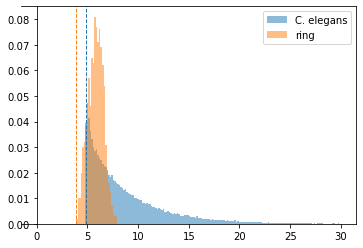

In [11]:
# historgrams degrees in the UMAP graphs
counts_c_elegans_, bins = np.histogram(deg_c_elegans_, bins=200, range=(0,30))
counts_ring_default, bins = np.histogram(deg_ring_default, bins=200, range=(0,30))

counts_c_elegans_ = counts_c_elegans_ / counts_c_elegans_.sum()
counts_ring_default = counts_ring_default / counts_ring_default.sum()

plt.figure()
hist_c_elegans = plt.hist(bins[:-1], weights=counts_c_elegans_, bins=bins, alpha=0.5, label="C. elegans")
hist_ring_default = plt.hist(bins[:-1], weights=counts_ring_default, bins=bins, alpha=0.5, label="ring")
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
#plt.yscale("symlog")
plt.legend()
plt.gca().axvline(x=np.log2(30), color='C0', linestyle='dashed', linewidth=1)
plt.gca().axvline(x=np.log2(15), color='C1', linestyle='dashed', linewidth=1)
plt.savefig(os.path.join(fig_path, f"degree_hist_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [12]:
# lower bounds for degrees in UMAP graphs
print(np.log2(umapperns_init.n_neighbors))
print(np.log2(umapperns.n_neighbors))



3.9068905956085187
4.906890595608519


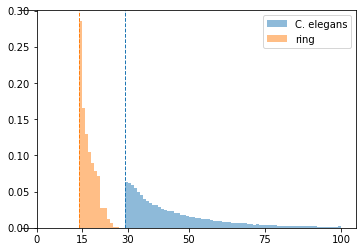

In [13]:
# compute and plot histogram for the degrees in the shared kNN graphs
counts_neigh_c_elegans_, bins = np.histogram(n_neighs_c_elegans_, bins=100, range=(0,100))
counts_neigh_c_elegans_ = counts_neigh_c_elegans_ / counts_neigh_c_elegans_.sum()

counts_neigh_ring_default, bins = np.histogram(n_neighs_ring, bins=100, range=(0,100))
counts_neigh_ring_default = counts_neigh_ring_default / counts_neigh_ring_default.sum()

plt.figure()
hist_neighs_c_elegans_ = plt.hist(bins[:-1],
                                         weights=counts_neigh_c_elegans_,
                                         bins=bins,
                                         alpha=0.5,
                                         label="C. elegans")
hist_neighs_ring_default = plt.hist(bins[:-1],
                                      weights=counts_neigh_ring_default,
                                      bins=bins,
                                      alpha=0.5,
                                      label="ring")
plt.xticks([0, 15, 30, 50, 75, 100])
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.legend()
#plt.yscale("symlog")
plt.gca().axvline(x=29, color='C0', linestyle='dashed', linewidth=1)  # one lower due to self-loop
plt.gca().axvline(x=14, color='C1', linestyle='dashed', linewidth=1)
plt.savefig(os.path.join(fig_path, f"degree_hist_kNN_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)



